# How does Finance work?
## We'll tell you

But first of all, we're going to need some modules to help us analyze the Data from *Yahoo Finance*. 


In [84]:
import pandas as pd #pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,built on top of the Python programming language
import numpy as np #NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
import os #we're needing that to get rid of files
import os.path #that one is neccesary to import data direclty from an URL
import yfinance as yf #very important to import data from yahoo finance!
import datetime as dt 
from yahoofinancials import YahooFinancials #to analyse the data
from datetime import datetime #This is used to work with dates
from datetime import date #This is used to work with dates
from pandas_datareader import data #Pandas Datareader is a Python package that allows us to create a pandas DataFrame object by using various data sources from the internet. It is popularly used for working with realtime stock price

We define a lot of things in the beginning. That way, if we want or need to use them later we can just call the variable without writing the code multiple times. This is a convenient way to safe smaller functions.

In [60]:
today = date.today()

In [75]:
start = datetime(2014,1,1)
end = today

In [ ]:
def std_plot 

# Plots

Since we're going to be ploting a lot of Data in this assignment, we're going to set a norm for how bit our plots are going to get, just to have a nice and clean project. 

#### Defined size

We're going to use 14 on the x-axis and 7 on the y-axis.

# Data

First we need to Import our data, as previously stated, we'll be working with data from *Yahoo Finance*. We're using *yfinance* to import the data, a module which we importet before.

### Bitcoin

In [78]:
BTC = yf.download('BTC-USD', start, end)
BTC.to_csv("BTC.csv")

[*********************100%***********************]  1 of 1 completed


### S&P 500

In [77]:
SP = yf.download('^GSPC', start, end)
SP.to_csv("BTC.csv")

[*********************100%***********************]  1 of 1 completed


# Data

We're going to use Data from Yahoo Finance from 2014 to today.

In [79]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Visualize

In the following cell, we are going to visualise the ajustet closing value of BTC in USD. 

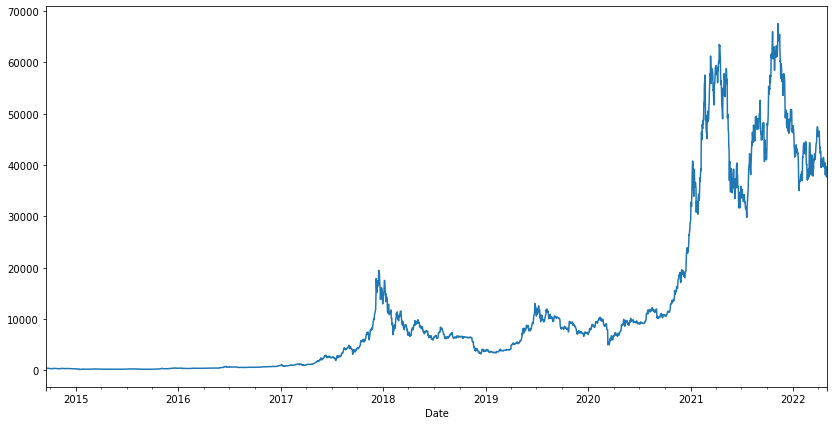

In [99]:
BTC['Adj Close'].plot(figsize=(14,7)) #this gives us the adj close
plt.show()

And now we are going to visualise the opening value, the closing value and the adjusted closing value.

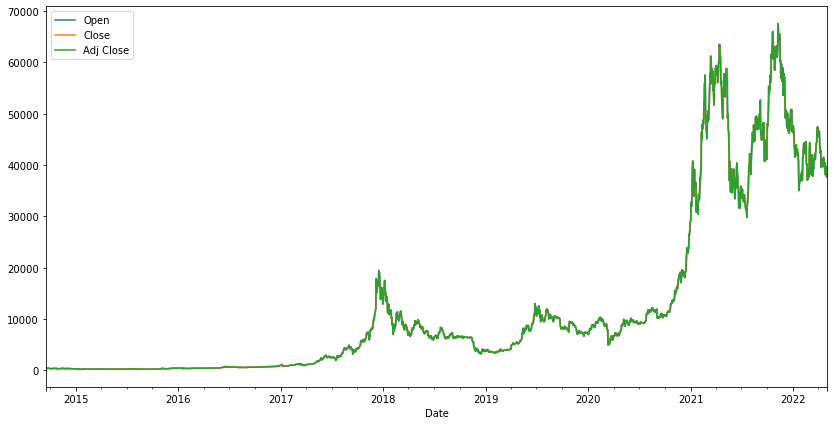

In [98]:
BTC[['Open', 'Close', 'Adj Close']].plot(figsize=(14,7))
plt.show()

But as you can see these three different values do not really show a difference there are only a few days where the opening Value and the closing value show a relatively big difference.

In order to extract the days where we had e big difference between opening and closing value, we need to calculate the difference for every day:

In [146]:
BTC['Difference 1'] = BTC['Open'] - BTC['Close']
BTC['Difference 2'] = BTC['Close'] - BTC['Open']
print("\nDifference of Open and Close :\n", BTC)


Difference of Open and Close :
                     Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-04-29  39768.617188  39887.269531  38235.535156  38609.824219   
2022-04-30  38605.859375  38771.210938  37697.941406  37714.875000   
2022-05-01  37713.265625  38627.859375  37585.789062  38469.093750   
2022-05-02  38472.187500  39074.972656  38156.562500  38529.328125   
2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125   

               Adj Close       Volume  Difference Open -

After we've calculated the difference, we no longer need all the other colums, therefore we can just get rid of them:

In [154]:
BTC_1 = BTC.drop(['High', 'Low', 'Volume', 'Open', 'Close', 'Adj Close', 'Difference Open - Close', 'Difference', 'Difference 2'], axis = 1)

BTC_1.head(5)

,Difference 1
Date,
2014-09-17,8.529999
2014-09-18,32.419983
2014-09-19,29.307007
2014-09-20,-14.230988
2014-09-21,9.263977


Now we can easily sort the Values, since we substracted the closing value from the opening value, we can now see the top 50 worst days to have invested in Bitcoin. For example if you bought one Bitcoin on th 12th of May in 2021, you would have lost 7563.996094 USD in just one day, by making a very bad Investment choice!

In [155]:
worst = BTC_1.sort_values('Difference 1', ascending = False)

worst.head(50)

,Difference 1
Date,
2021-05-12,7563.996094
2021-05-19,5942.535156
2021-09-07,5849.351562
2021-11-26,5390.519531
2021-02-23,5380.503906
2021-01-21,4723.699219
2021-12-04,4527.175781
2021-04-18,4485.703125
2021-09-20,4417.605469


In [159]:
worst = BTC_1.sort_values('Difference 1')

worst.head(50)

,Difference 1
Date,
2021-02-08,-7309.636719
2022-02-28,-5487.234375
2021-04-26,-4943.960938
2021-03-01,-4471.738281
2022-02-04,-4351.609375
2021-10-01,-4300.199219
2021-10-15,-4248.046875
2021-11-08,-4222.761719
2021-02-19,-4212.152344


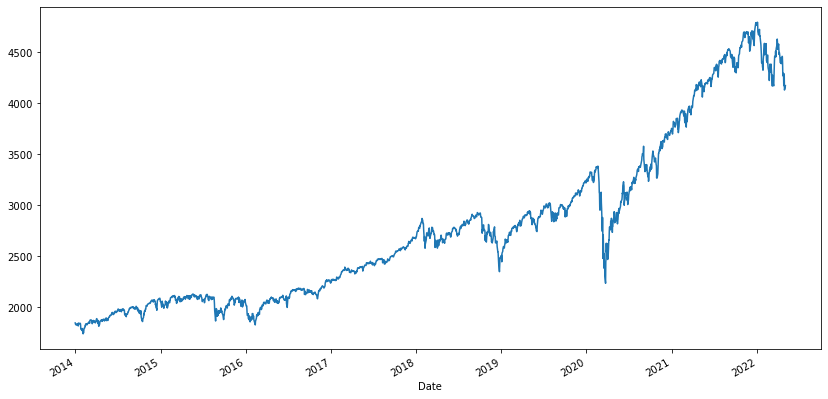

In [89]:
SP['Adj Close'].plot(figsize=(14,7)) #this gives us the adj close
plt.show()


In [80]:
SP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,1842.609985,1849.439941,1842.410034,1848.359985,1848.359985,2312840000
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000


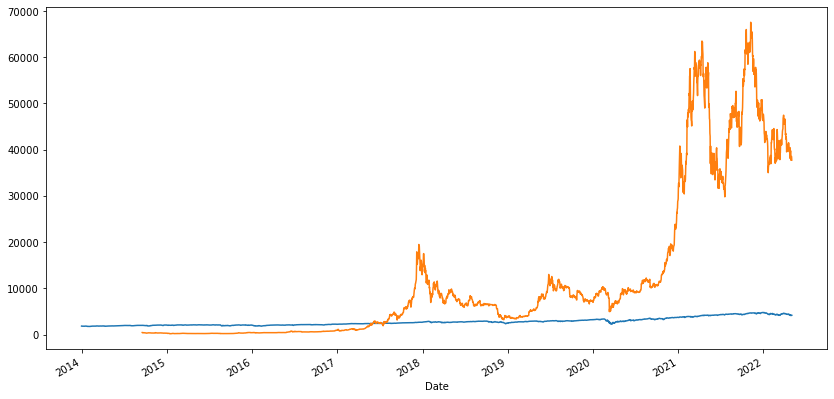

In [93]:
SP['Adj Close'].plot(figsize=(14,7)) #this gives us the adj close
BTC['Adj Close'].plot(figsize=(14,7)) #this gives us the adj close
plt.show()